In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [83]:
df = pd.read_csv('Block Puzzle 增长看板 - temp.csv')

In [84]:
df.head(10)

,date,silence,active,new,dau,d1_active_retention,d1_new_retention,d7_active_retention,d7_new_retention,next_dau
0,2020/8/2,148733,1139788,77121,1365642,0.637,0.423,0.525,0.208,1348187
1,2020/8/3,104713,1174081,69393,1348187,0.629,0.415,0.529,0.211,1339856
2,2020/8/4,96914,1173334,69608,1339856,0.646,0.429,0.542,0.210,1334560
3,2020/8/5,94268,1172861,67431,1334560,0.652,0.440,0.548,0.216,1327939
4,2020/8/6,94473,1164967,68499,1327939,0.650,0.425,0.550,0.207,1315414
5,2020/8/7,96230,1152171,67013,1315414,0.646,0.426,0.552,0.207,1296850
6,2020/8/8,103343,1127791,65716,1296850,0.633,0.412,0.548,0.203,1311300
7,2020/8/9,92924,1146851,71525,1311300,0.639,0.417,0.540,0.205,1308726
8,2020/8/10,85073,1155885,67768,1308726,0.634,0.406,0.545,0.208,1312995
9,2020/8/11,83372,1160774,68849,1312995,0.654,0.423,0.553,0.203,1320917


In [85]:
df['date'] = df['date'].astype('datetime64')

In [86]:
x = df[df['date']<='2020-09-30'][['silence','active','new','d1_active_retention','d1_new_retention','d7_active_retention','d7_new_retention']]
y = df[df['date']<='2020-09-30']['next_dau']
lrModel = LinearRegression()
lrModel.fit(x,y)

LinearRegression()

In [87]:
lrModel.coef_

array([ 9.19064796e-01,  9.84502601e-01,  1.31665543e+00, -1.16418987e+06,
        2.63793634e+05,  1.19246184e+06, -7.06222559e+05])

In [88]:
lrModel.intercept_

133425.6536491653

In [89]:
lrModel.score(x,y)

0.9545092881411719

In [90]:
y_predicted = lrModel.predict(x)

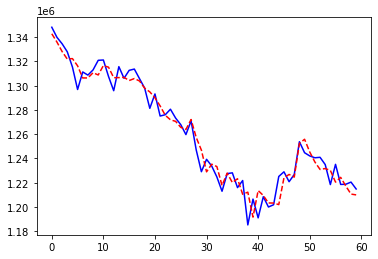

In [91]:
plt.plot(y,'b-')
plt.plot(y_predicted,'r--')
plt.show()

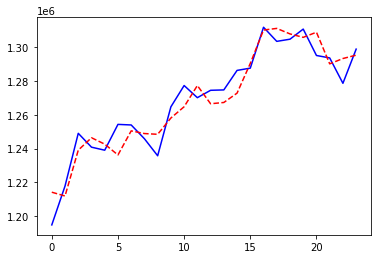

In [92]:
y_test = df[df['date']>'2020-09-30']['next_dau'].tolist()
x_test = df[df['date']>'2020-09-30'][['silence','active','new','d1_active_retention','d1_new_retention','d7_active_retention','d7_new_retention']]
y_test_predict = lrModel.predict(x_test)
plt.plot(y_test,'b-')
plt.plot(y_test_predict,'r--')
plt.show()

In [93]:
# output = [y_test,y_test_predict.tolist()]
output = pd.DataFrame(y_test,columns=['y_test'])
output['y_test_predict'] = y_test_predict.tolist()

In [94]:
output['diff'] = output['y_test_predict'] - output['y_test']
output

,y_test,y_test_predict,diff
0,1194824,1214170.995,19346.995
1,1217818,1211926.103,-5891.897
2,1249004,1239026.116,-9977.884
3,1240808,1246385.762,5577.762
4,1239010,1242589.662,3579.662
5,1254280,1236201.660,-18078.340
6,1253938,1250446.432,-3491.568
7,1245792,1248866.725,3074.725
8,1235720,1248411.709,12691.709
9,1264670,1258051.450,-6618.550


<h1>test</h1>